<a href="https://colab.research.google.com/github/juanlu29/juanlu29/blob/contaminacionMadrid/preprocesadoDatosContaminacionMadrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Visualizacion de datos de contaminacion de Madrid. Hasta ahora dispongo de 

## Plaza del Cármen, NO2
## Casa de campo, NO2, O3
## Plaza elíptica, Fernández Ladreda,  NO2

Cuatro datasets

El formato es diario partiendo del día 1-1-2010 y las unidades mg/m^3

In [2]:
import pandas as pd
from google.colab import drive
import numpy as np
drive.mount('/content/drive/')

# Exploramos los directorios de drive. Cambiamos directorio a donde estan los datos
%cd /content/drive/My\ Drive/datosContaminacionMadrid

# Lo pasamos a dataframes
est56NO2_df = pd.read_csv('Est56FL_CodPar08NO2_valuesonly.txt', header=0)
est24NO2_df = pd.read_csv('Est24CC_CodPar08NO2_valuesonly.txt', header=0)
est03NO2_df = pd.read_csv('Est03PlC_CodPar08NO2_valuesonly.txt', header=0)
est03O3_df  = pd.read_csv('Est03PlC_CodPar14O3_valuesonly.txt', header=0)




Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/datosContaminacionMadrid


Visualizacion interactiva de datos

In [ ]:
import altair as alt
from vega_datasets import data



alt.Chart(est56NO2_df.reset_index()).mark_point().encode(
    x='index',
    y='x',
).interactive()



alt.Chart(...)

In [ ]:
alt.Chart(est03O3_df.reset_index()).mark_line().encode(
    x='index',
    y='x',
).interactive()

alt.Chart(...)

In [ ]:
alt.Chart(est03NO2_df.reset_index()).mark_line().encode(
    x='index',
    y='x',
).interactive()

alt.Chart(...)

## Calculo de correlaciones en los datos.

[86.62179614  1.81448874  6.0336363  ...  0.1649427   0.26229594
  0.49178062]
Frecuencia promedio de la señal : 0.22906997023299994
frecuencia maxima : [16.78952444]
Frecuencia máxima de la señal : [0.95442092]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 1

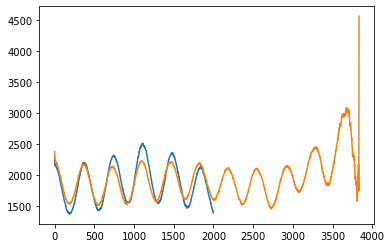

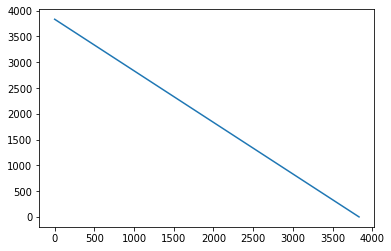

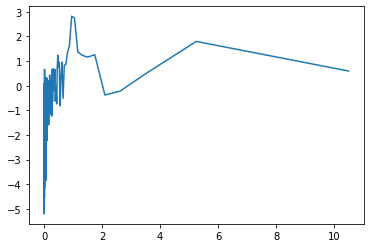

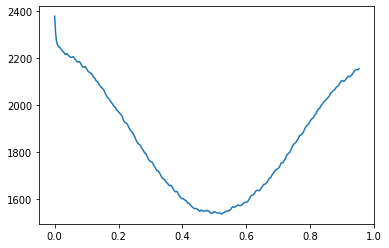

In [151]:
import matplotlib.pyplot as plt
from scipy.fft import fft

def autocorrelacion(datos):
  '''
  Dada una serie temporal 1D, calcula su autocorrelacion siendo ademas argumento de salida
  '''
  correlacion = []
  promediados = []
  longitudDatos = len(datos)
  for distanciaCorr in range(len(datos)):
    realizacionesParaPromediar = len(datos) - distanciaCorr # Numero de veces que podemos convulocionar el array sobre si mismo
    promediados.append(realizacionesParaPromediar)
    correlacion.append(0.)
    for muestra in range(realizacionesParaPromediar):
       correlacion[distanciaCorr] += datos[muestra]*datos[muestra + distanciaCorr]
       
    correlacion[distanciaCorr] = correlacion[distanciaCorr]/float(realizacionesParaPromediar)

  return np.asarray(correlacion), promediados

def frecuenciasInternas(datos,dx):
  '''
  Dada una serie de datos devuelve el espectro de frecuencias que lo compone y el dominio espectral correspondiente
  dx la unidad minima en la que el dominio esta particionado
  '''
  datosf = fft(datos)


  x = np.linspace(0.0, len(datos)*dx, len(datos))
  xf = np.linspace(0.0, 1.0/(2.0*dx), len(datos)//2)

  s_datosf_sq = np.real((2./len(datos))*np.sqrt(np.multiply(datosf,np.conj(datosf)))[0:len(datos)//2])

  return s_datosf_sq, xf

################

datos = est03O3_df.to_numpy()

longitudDatos = len(datos)

correlacion = np.zeros(2000)
for j in range(2000):
  for i in range(1000):
    correlacion[j] += datos[i,0]*datos[j+i,0]
  correlacion[j] = 0.001*correlacion[j]

plt.plot(correlacion)


correlacion, parapromediar = autocorrelacion(datos[:,0])
frecuencias, xf = frecuenciasInternas(datos[:,0],1.)
print(frecuencias)

plt.plot(correlacion)

fig, ax = plt.subplots(1,1)
figf, axf = plt.subplots(1,1)

ax.plot(parapromediar)
#periodos = 1./(365.*xf)
#periodos[0] = 0.
periodos = xf[1:]
frecuencias = frecuencias[1:]
periodos = 1./(365.*periodos)
axf.plot(periodos,np.log(frecuencias))

C  = np.sum(frecuencias)

print( "Frecuencia promedio de la señal :",   np.sum(   np.multiply(   periodos , frecuencias/np.sum(frecuencias)    )    )    )
frecuenciaMaxima = np.where(frecuencias == np.amax(frecuencias)) # Operador & para evaular elemento a elemento entre arrays
print("frecuencia maxima :",frecuencias[frecuenciaMaxima])
print( "Frecuencia máxima de la señal :", periodos[frecuenciaMaxima])


fig_cor_p, ax_cor_p = plt.subplots(1,1)

x = np.arange(len(correlacion))
x = x*(1./365.)

acab = np.asarray(list(zip(x,correlacion)))

resultados = np.where(acab[:,0]<periodos[frecuenciaMaxima])
print(resultados[0])

#resultados = [np.array(zipped[0],zipped[1]) for zipped[0] < periodos[frecuenciaMaxima] in list(zip(x,correlacion))]

ax_cor_p.plot(acab[resultados[0],0],acab[resultados[0],1])

fig.show()gom%%2955


figf.show()

fig_cor_p.show()




Correlacion entre un punto y j : 0  siguientes
Correlacion entre un punto y j : 1  siguientes
Correlacion entre un punto y j : 2  siguientes
Correlacion entre un punto y j : 3  siguientes
Correlacion entre un punto y j : 4  siguientes
Correlacion entre un punto y j : 5  siguientes
Correlacion entre un punto y j : 6  siguientes
Correlacion entre un punto y j : 7  siguientes
Correlacion entre un punto y j : 8  siguientes
Correlacion entre un punto y j : 9  siguientes
Correlacion entre un punto y j : 10  siguientes
Correlacion entre un punto y j : 11  siguientes
Correlacion entre un punto y j : 12  siguientes
Correlacion entre un punto y j : 13  siguientes
Correlacion entre un punto y j : 14  siguientes
Correlacion entre un punto y j : 15  siguientes
Correlacion entre un punto y j : 16  siguientes
Correlacion entre un punto y j : 17  siguientes
Correlacion entre un punto y j : 18  siguientes
Correlacion entre un punto y j : 19  siguientes
Correlacion entre un punto y j : 20  siguientes
Co

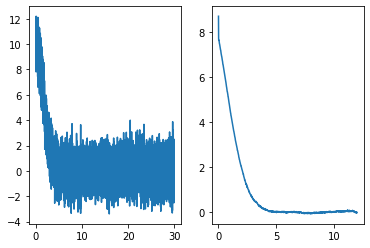

In [40]:
import random

# Un ejemplo de juguete para ver si tiene sentido lo que estoy pensando
x = np.linspace(0,30,10000)
Sruido = 1.
ruido = Sruido*np.fromiter([random.gauss(0.0, 1.0) for i in range(10000)],float)
l = 5.
A = 10.
datos = A*np.exp(-np.power(x,2)/l) + ruido

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(x,datos)

correlacion = np.zeros(1000)
x_corr = np.zeros(1000)
f = 4
inc = 0
for j in range(1000):
  x_corr[j] = x[inc]
  print("Correlacion entre un punto y j :",j," siguientes")
  for i in range(10000-4000):
    correlacion[j] += datos[i]*datos[i+inc]
  correlacion[j] = correlacion[j]/(10000-4000)
  inc = inc + f

ax2.plot(x_corr,correlacion)

fig.show()
